In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(43)
feature_1 = np.random.randn(100)
feature_2 = feature_1 + np.random.normal(0, 0.3, 100)
feature_3 = np.random.randn(100)
feature_4 = feature_3 + np.random.normal(0, 0.3, 100)
labels = np.random.randint(0, 2, 100)

data = np.column_stack((feature_1, feature_2, feature_3, feature_4, labels))
dataset = pd.DataFrame(data, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Label'])

In [3]:
training_data = dataset.drop(columns=['Label']).T  
X_transpose = np.array(training_data)

In [4]:
mean = np.mean(X_transpose, axis=1, keepdims=True)
X_bar_transpose = X_transpose - mean
X_bar = X_bar_transpose.T 

N_train = X_bar.shape[0]  
sigma = (1 / N_train) * (X_bar.T @ X_bar)

In [5]:
factorial_sigma = np.linalg.svd(sigma)
Q_transpose = factorial_sigma[0]  
Lambda = factorial_sigma[1]       
Q = Q_transpose.T                 

Z = np.matmul(Q, X_bar.T) 
projected_training_data = pd.DataFrame(Z.T, columns=[f"z{i+1}" for i in range(Z.shape[0])])

In [6]:
D = projected_training_data.cov()
print("Covariance Matrix of Projected Data (Diagonal):")
print(D)



Covariance Matrix of Projected Data (Diagonal):
              z1            z2            z3            z4
z1  1.959330e+00 -7.445534e-17 -1.076415e-16 -1.649164e-16
z2 -7.445534e-17  1.630722e+00  2.313573e-16  1.021755e-16
z3 -1.076415e-16  2.313573e-16  5.302049e-02  1.959113e-17
z4 -1.649164e-16  1.021755e-16  1.959113e-17  4.289177e-02


In [7]:
total_variance = np.sum(Lambda)
var_sum = 0
preserved_variance_percentage = 0.9  
num_components = 0

for i in range(Lambda.shape[0]):
    var_sum += Lambda[i]
    num_components += 1
    if var_sum / total_variance >= preserved_variance_percentage:
        break

print(f"\nNumber of Principal Components to Preserve {preserved_variance_percentage * 100}% Variance: {num_components}")

Z_dim_reduced = projected_training_data.iloc[:, :num_components]
print("\nDimensionality Reduced Data:")
print(Z_dim_reduced.head())



Number of Principal Components to Preserve 90.0% Variance: 2

Dimensionality Reduced Data:
         z1        z2
0  1.658738  2.722516
1  1.948602 -0.356228
2 -0.242274 -1.239757
3 -0.803788 -2.041109
4 -0.759298  0.609399


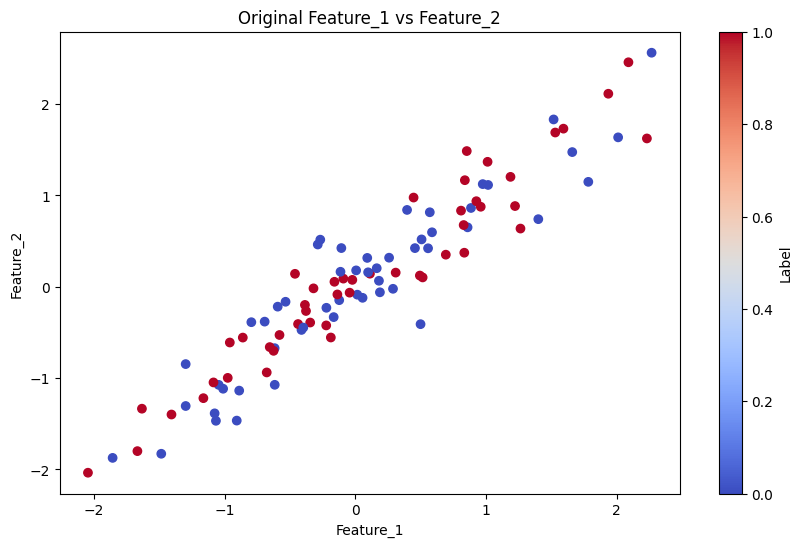

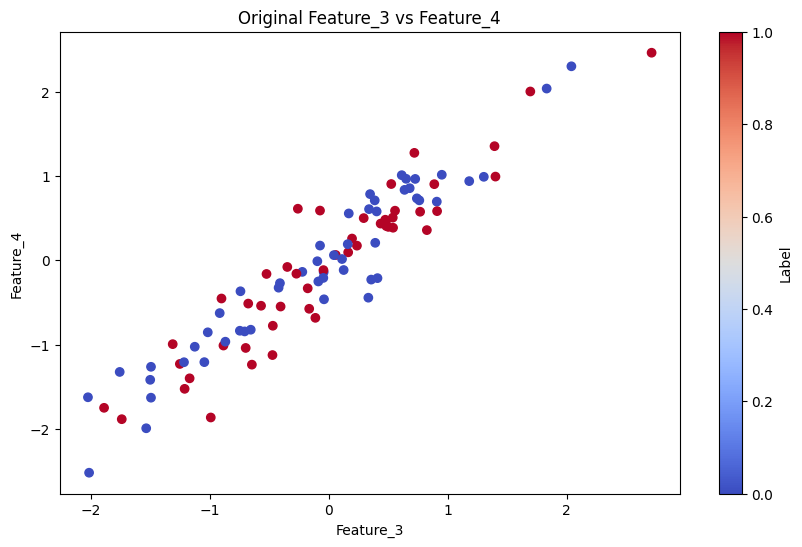

In [11]:
# Original features (scatter plot of Feature_1 vs Feature_2 and Feature_3 vs Feature_4)
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Feature_1'], dataset['Feature_2'], c=dataset['Label'], cmap='coolwarm')
plt.title('Original Feature_1 vs Feature_2')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.colorbar(label='Label')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dataset['Feature_3'], dataset['Feature_4'], c=dataset['Label'], cmap='coolwarm')
plt.title('Original Feature_3 vs Feature_4')
plt.xlabel('Feature_3')
plt.ylabel('Feature_4')
plt.colorbar(label='Label')
plt.show()


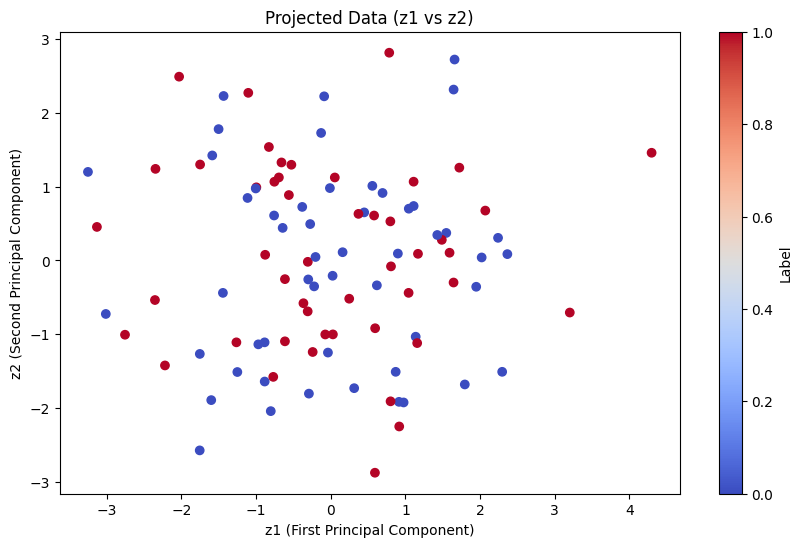

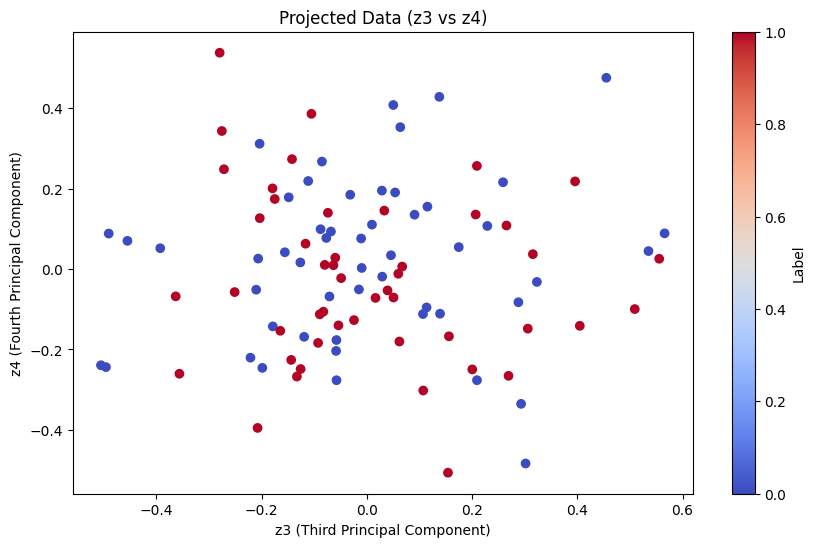

In [12]:
# Projected data (First Four Principal Components: z1, z2, z3, z4)
plt.figure(figsize=(10, 6))
plt.scatter(projected_training_data['z1'], projected_training_data['z2'], c=dataset['Label'], cmap='coolwarm')
plt.title('Projected Data (z1 vs z2)')
plt.xlabel('z1 (First Principal Component)')
plt.ylabel('z2 (Second Principal Component)')
plt.colorbar(label='Label')
plt.show()

# If you want to visualize z3 and z4:
plt.figure(figsize=(10, 6))
plt.scatter(projected_training_data['z3'], projected_training_data['z4'], c=dataset['Label'], cmap='coolwarm')
plt.title('Projected Data (z3 vs z4)')
plt.xlabel('z3 (Third Principal Component)')
plt.ylabel('z4 (Fourth Principal Component)')
plt.colorbar(label='Label')
plt.show()


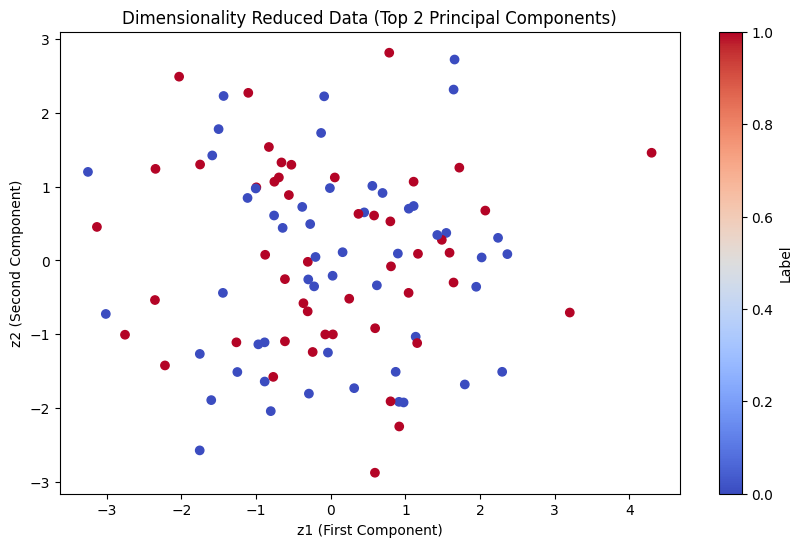

In [13]:
# Dimensionality-reduced data using the specified number of components
plt.figure(figsize=(10, 6))
plt.scatter(Z_dim_reduced.iloc[:, 0], Z_dim_reduced.iloc[:, 1], c=dataset['Label'], cmap='coolwarm')
plt.title(f'Dimensionality Reduced Data (Top {num_components} Principal Components)')
plt.xlabel(f'z1 (First Component)')
plt.ylabel(f'z2 (Second Component)')
plt.colorbar(label='Label')
plt.show()
